# Import Data and Library

In [1]:
# Connect to drive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scy
import random as rnd
import statistics as stat
import os

In [3]:
# Locating file
os.chdir('/content/drive/MyDrive/Kerja/Portofolio/Heart Disease')

In [4]:
# Data import
df = pd.read_csv('heart.csv')

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

# Data Exploration

In [6]:
# Check dataframe shape
print ('number of rows:', df.shape[0])
print ('number of columns:', df.shape[1])

number of rows: 1025
number of columns: 14


In [7]:
# DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Variables in the dataframe

1. age
2. sex
  - value 0: female
  - value 1: male
3. chest pain type (4 values)
  - value 0: typical angina
  - value 1: atypical angina
  - value 2: non-anginal pain
  - value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestrol in mg/dl
6. fbs: (fasting blood sugar> 120 mg/dl)(1 = true; 0 = false)
7. restecg: resting electrocardiographic results
  - value 0: normal
  - value 1: having ST-T wave abnormality(T wave inversions and/or - ST elevation or depression of> 0.05 mV)
  - value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1=yes; 0=no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
  - value 1: upsloping
  - value 2: flat
  - value 3: downloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0=less chance of heart attack, 1 = more chance of heart attack

In [8]:
# Check missing data and duplication
print ('number of missing data:', df.isna().sum().sum())
print ('number of duplicated data:', df.duplicated().sum())

number of missing data: 0
number of duplicated data: 723


In [9]:
# Handling missing data and duplication
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
# Check missing data and duplication after data removal
print ('number of missing data:', df.isna().sum().sum())
print ('number of duplicated data:', df.duplicated().sum())

number of missing data: 0
number of duplicated data: 0


In [11]:
# Descriptive statistics
df[['age', 'trestbps','chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


<Axes: title={'center': 'Gender Proportion'}, ylabel='count'>

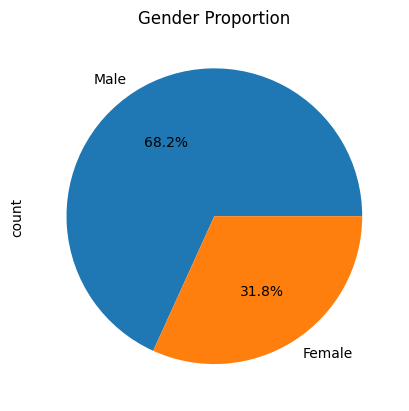

In [12]:
# Gender proportion
labels = 'Male', 'Female'
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=labels, title='Gender Proportion')

<ipython-input-13-bf881d379a91>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cp_bar.set_xticklabels(['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])


[Text(0, 0, '143'), Text(0, 0, '50'), Text(0, 0, '86'), Text(0, 0, '23')]

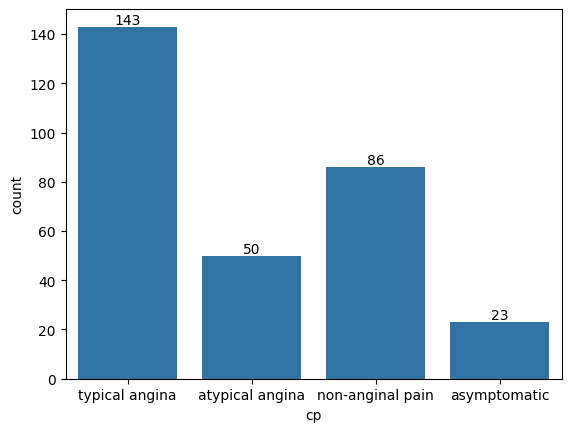

In [13]:
# Number of chest pain for each type
cp_bar = sns.countplot(x='cp', data=df)
cp_bar.set_xticklabels(['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
cp_bar.bar_label(cp_bar.containers[0])

<Axes: >

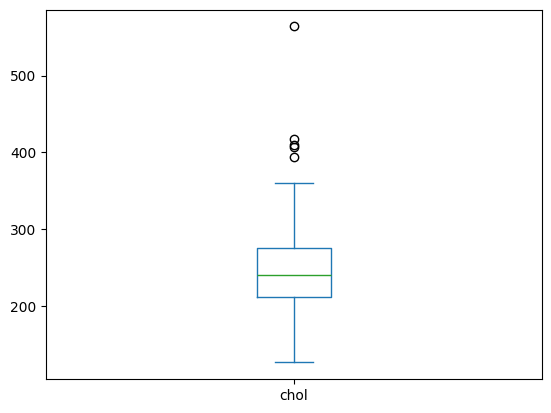

In [14]:
# Detecting outliers
# chol
df['chol'].plot(kind='box')

<Axes: >

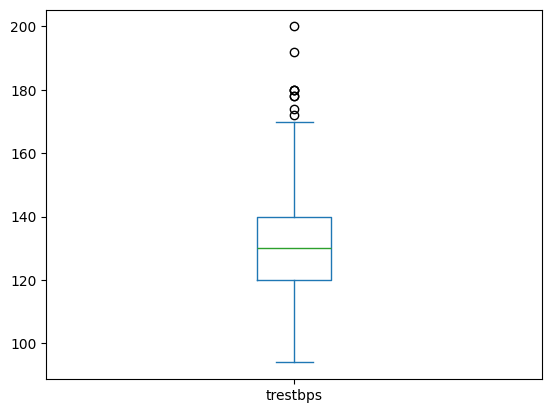

In [15]:
# Detecting outliers
# trestbps
df['trestbps'].plot(kind='box')

In [16]:
# Outlier function
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [17]:
# chol' outliers
chol_outliers = find_outliers_IQR(df['chol'])
df[df['chol'].isin(chol_outliers)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [18]:
# trestbps' outliers
trestbps_outliers = find_outliers_IQR(df['trestbps'])
df[df['trestbps'].isin(trestbps_outliers)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
343,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
396,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [19]:
# Male with heart disease
df[df['sex'] == 1]['target'].value_counts()

,count
target,
0,114
1,92


In [20]:
# Female with heart disease
df[df['sex'] == 0]['target'].value_counts()

,count
target,
1,72
0,24


# Splitting Data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [22]:
# Data split
X = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((241, 13), (61, 13), (241,), (61,))

In [23]:
min_max_scaler = StandardScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [24]:
x_train

array([[-0.68263287,  0.6852096 , -0.98005432, ..., -0.71553867,
        -0.70553555,  1.1181192 ],
       [ 0.40398881,  0.6852096 , -0.98005432, ..., -0.71553867,
         1.24887901,  1.1181192 ],
       [-1.00861938, -1.45940746, -0.00404981, ..., -0.71553867,
        -0.70553555, -0.54525566],
       ...,
       [ 0.62131314, -1.45940746,  1.9479592 , ...,  0.99183578,
        -0.70553555, -0.54525566],
       [ 1.38194832, -1.45940746,  0.97195469, ...,  0.99183578,
         0.27167173, -0.54525566],
       [-1.33460588,  0.6852096 , -0.00404981, ...,  0.99183578,
        -0.70553555, -0.54525566]])

In [25]:
x_test

array([[-1.11728155e+00,  6.85209599e-01, -4.04981122e-03,
        -5.55326681e-02, -5.40260460e-01, -4.25878561e-01,
        -1.02487724e+00,  1.66644980e+00, -7.18138754e-01,
        -8.90634892e-01,  9.91835775e-01, -7.05535547e-01,
        -5.45255660e-01],
       [ 8.38637481e-01, -1.45940746e+00,  9.71954693e-01,
        -5.55326681e-02,  2.80972613e-01, -4.25878561e-01,
         8.60583944e-01, -2.26079182e+00, -7.18138754e-01,
         1.72831709e-01, -7.15538666e-01,  2.71671734e-01,
         1.11811920e+00],
       [ 4.03988808e-01, -1.45940746e+00, -9.80054316e-01,
         2.26193452e+00, -4.28274131e-01,  2.34808720e+00,
        -1.02487724e+00, -1.46123258e-01,  1.39248856e+00,
         1.59078718e+00, -7.15538666e-01,  1.24887901e+00,
        -2.20863052e+00],
       [ 9.47299649e-01,  6.85209599e-01,  1.94795920e+00,
         8.13517528e-01, -2.78959027e-01,  2.34808720e+00,
        -1.02487724e+00,  2.65027477e-02, -7.18138754e-01,
         1.14767609e+00, -2.42291311e

# Model Algorithm: KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors=3)
#dtc = DecisionTreeClassifier()

In [27]:
knn.fit(x_train, y_train)
#dtc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
y_train_predict_knn = knn.predict(x_train)
#y_train_predict_dtc = dtc.predict(x_train)

In [29]:
y_test_predict_knn = knn.predict(x_test)
#y_test_predict_dtc = dtc.predict(x_test)

In [30]:
print('Train Accuracy KNN:', accuracy_score(y_train, y_train_predict_knn))
#print('Train Accuracy DTC:', accuracy_score(y_train, y_train_predict_dtc

Train Accuracy KNN: 0.8879668049792531


In [31]:
print(classification_report(y_train, y_train_predict_knn))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       106
           1       0.88      0.93      0.90       135

    accuracy                           0.89       241
   macro avg       0.89      0.88      0.89       241
weighted avg       0.89      0.89      0.89       241



In [32]:
print(classification_report(y_test, y_test_predict_knn))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.72      0.79      0.75        29

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



In [33]:
print(f1_score(y_test, y_test_predict_knn))

0.7540983606557377


# Model Algorithm DTC

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#knn = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier()

In [35]:
#knn.fit(x_train, y_train)
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
#y_train_predict_knn = knn.predict(x_train)
y_train_predict_dtc = dtc.predict(x_train)

In [37]:
#y_test_predict_knn = knn.predict(x_test)
y_test_predict_dtc = dtc.predict(x_test)

In [38]:
#print('Train Accuracy KNN:', accuracy_score(y_train, y_train_predict_knn))
print('Train Accuracy DTC:', accuracy_score(y_train, y_train_predict_dtc))

Train Accuracy DTC: 1.0


In [39]:
print(classification_report(y_train, y_train_predict_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       135

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



In [40]:
print(classification_report(y_test, y_test_predict_dtc))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        32
           1       0.74      0.69      0.71        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [41]:
print(f1_score(y_test, y_test_predict_dtc))

0.7142857142857143


# Model Algorithm Logistic Regresssion

In [46]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

In [47]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84       106
           1       0.85      0.92      0.88       135

    accuracy                           0.86       241
   macro avg       0.87      0.86      0.86       241
weighted avg       0.86      0.86      0.86       241



In [48]:
print(confusion_matrix(y_train, y_pred_train))

[[ 84  22]
 [ 11 124]]


In [49]:
print(f1_score(y_train, y_pred_train))

0.8825622775800712


In [50]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



In [51]:
print(confusion_matrix(y_test, y_pred_test))

[[21 11]
 [ 3 26]]


In [52]:
print(f1_score(y_test, y_pred_test))

0.7878787878787878


# Model Algorithm XGboost

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

xgboost = GradientBoostingClassifier()
xgboost.fit(x_train, y_train)
y_pred_train = xgboost.predict(x_train)
y_pred_test = xgboost.predict(x_test)

In [54]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       135

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



In [55]:
print(confusion_matrix(y_train, y_pred_train))

[[106   0]
 [  0 135]]


In [56]:
print(f1_score(y_train, y_pred_train))

1.0


In [57]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [58]:
print(confusion_matrix(y_test, y_pred_test))

[[24  8]
 [ 4 25]]


In [59]:
print(f1_score(y_test, y_pred_test))

0.8064516129032258
